Ok. So I want to find $P\{X > 3\}$ where $X \sim \mathcal{N}(0,1)$. I will use *adaptive importance sampling* to answer this question. 

I start with defining the error term as:

\begin{equation}
    e(\Theta) = \frac{1}{2} \int_z (f_\Theta(z) - f^*(z))^2 dz
\end{equation}

So we have:

\begin{equation}
    \frac{\partial e}{\partial \theta} = \int_z \frac{\partial f}{\partial \theta}(z)  (f_\Theta(z) - f^*(z)) dz
\end{equation}

Which we can approximate by:

\begin{equation}
    \int_z \frac{\partial f}{\partial \theta}(z)   (1 - \frac{w_\Theta(z)}{\hat{G}} ) f_\Theta(z) dz
\end{equation}

And this can be approximated by 
\begin{equation}
    \frac{1}{N} \sum \frac{\partial f}{\partial \theta}(z) (1 - \frac{w_\theta(z)}{\hat{G}})
\end{equation}

In this exmaple, we parameterize the proposal distribution by $\mu, \sigma$, which means that $f(z) = \mathcal{N}(\mu, \sigma)$. By definition, $g(z) = \mathbb{I}[Z>3] \mathcal{N}(0, 1)$.

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from __future__ import print_function

In [160]:
import numpy as np
from scipy.stats import norm
from utlis import fprime_normal_m, fprime_normal_s

mu = 0.0
# sigma = exp(s) = 1
s = 0.0

alpha = 0.05
tol = 1e-4
N = 100

# Start with a weight of 0.5
Gs = [0.5]
w1 = 0.1

mu_list = []
sig_list = []
s_list = []
dmu_list = []
ds_list = []
G_avg_list = []

condition = False
num_iter = 0
while condition is False:
    num_iter += 1
    sigma = np.exp(s)
    
    # for plotting
    mu_list.append(mu)
    s_list.append(s)
    sig_list.append(sigma)
    
    w = [0.0] * N
    z = [0.0] * N
    for i in range(N):
        rnd = np.random.normal(mu, sigma)
        z[i] = rnd
        if rnd < 3:
            w[i] = 0
        else:
            w[i] = norm.pdf(rnd) / norm.pdf(rnd, mu, sigma)
        
    G_t = sum(w) / float(N)
    Gs.append(G_t)
    # compute the average here
    # Gw = [w1] + range(1, len(Gs))
    Gw = [w1] + ([1] * (len(Gs)-1))
    G_avg = sum([Gw[i] * Gs[i] for i in range(len(Gw))]) / sum(Gw)
    G_avg_list.append(G_avg)
    
    d_mu = 0.0
    d_s = 0.0
    for i in range(N):
        coef = 1 - w[i]/G_avg
        f_mu = fprime_normal_m(z[i], mu, s)
        f_s = fprime_normal_s(z[i], mu, s)
        d_mu += f_mu * coef
        d_s += f_s * coef
    d_mu /= float(N)
    d_s /= float(N)
    
    dmu_list.append(d_mu)
    ds_list.append(d_s)
    
    mu -= (alpha * d_mu)
    s -= (alpha * d_s)
    

        
    if abs(d_mu) < tol and abs(d_s) < tol:
        condition = True
    if num_iter > 10000:
        condition = True



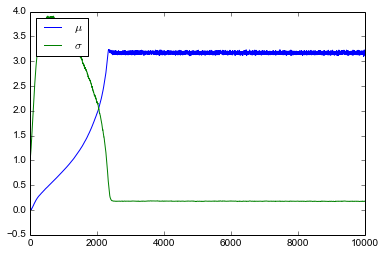

In [161]:
plt.plot(mu_list)
plt.plot(sig_list)
plt.legend([r'$\mu$', r'$\sigma$'], loc=2)

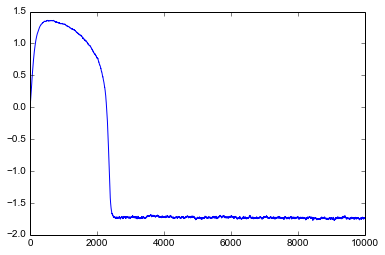

In [162]:
plt.plot(s_list)

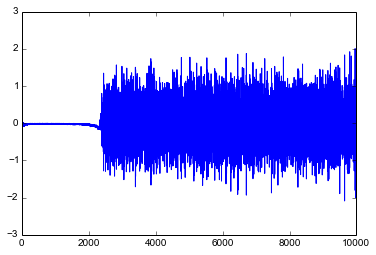

In [163]:
plt.plot(dmu_list)

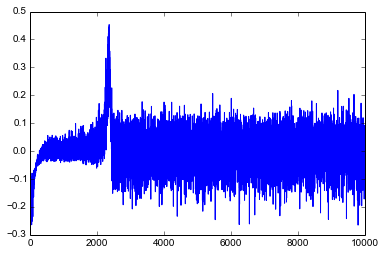

In [164]:
plt.plot(ds_list)

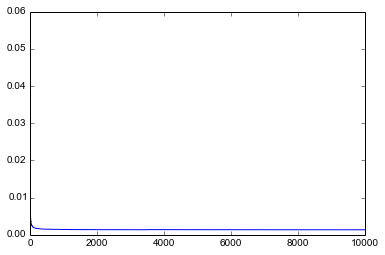

In [165]:
plt.plot(G_avg_list)

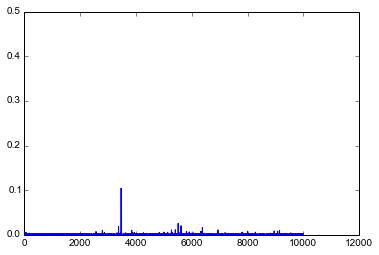

In [166]:
plt.plot(Gs)